In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
# Giả định df là DataFrame chứa dữ liệu của bạn
df= pd.read_csv('../../data/batdongsan/numerized/ChungCu_numerized-dataset.csv')
df = df.dropna()
df["USD"] = (df["MucGia"]/25000).round(2)
# df=df.drop(columns="MucGia")
df=df.drop(columns=["Unnamed: 0","DiaChi","MucGia","Lat","Long"])

In [3]:
# Assuming df is your DataFrame
X = df.iloc[:,0:10].values#features
y = df.iloc[:,10].values# Target variable# Target variable

In [4]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Making predictions on the test data
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18296020528.85491
Root Mean Squared Error: 135262.78323639106
R-squared: 0.4811839371646678


# Một số biểu đồ trực quan 

1. Biểu Đồ Dự Đoán So Với Giá Trị Thực Tế (Predicted vs. Actual)


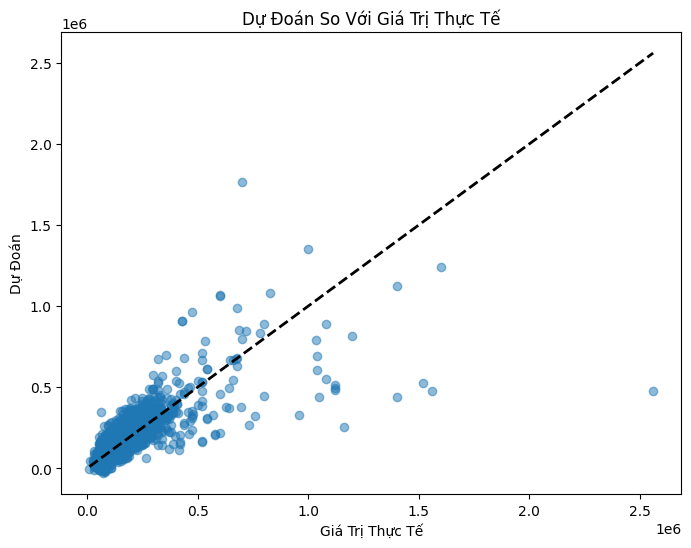

In [6]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ dự đoán so với giá trị thực tế
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Giá Trị Thực Tế')
plt.ylabel('Dự Đoán')
plt.title('Dự Đoán So Với Giá Trị Thực Tế')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


2. Biểu Đồ mức độ phù hợp của mô hình


NameError: name 'y_pred' is not defined

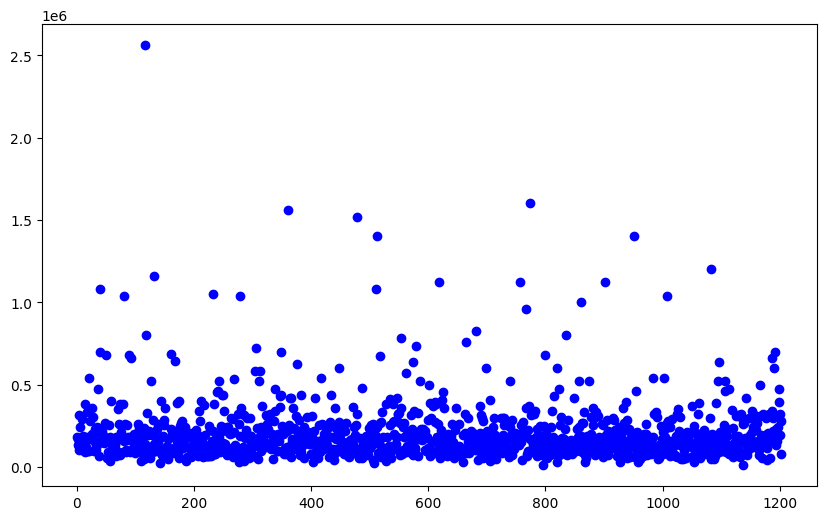

In [8]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ giá trị thực tế và dự đoán trên cùng một biểu đồ
plt.figure(figsize=(10, 6))

plt.scatter(range(len(y_test)), y_test, color='blue', label='Giá Trị Thực Tế')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Giá Trị Dự Đoán')

plt.xlabel('Index')
plt.ylabel('Giá Trị')
plt.title('Giá Trị Thực Tế vs Giá Trị Dự Đoán')
plt.legend()

# Hiển thị biểu đồ
plt.show()
